# Assigning weights to theissen polygons 

In [28]:
import geopandas
import pandas
import matplotlib.pyplot as plt 

# Importing the shapefiles of Districts, Met stations, Thiessen Polygons
districts = geopandas.read_file(r"D:\JP CERTIFICATES\IITK\Course summerterm\AArcGIS project\python_integration\Automate Geoprocessing using Python GeoPandas\Automate Geoprocessing using Python GeoPandas\Shapefiles\Nepal_Districts.shp")
rainfall_stations = geopandas.read_file(r"D:\JP CERTIFICATES\IITK\Course summerterm\AArcGIS project\python_integration\Automate Geoprocessing using Python GeoPandas\Automate Geoprocessing using Python GeoPandas\Shapefiles\Met_Stns.shp")
thiessen_polygons = geopandas.read_file(r"D:\JP CERTIFICATES\IITK\Course summerterm\AArcGIS project\python_integration\Automate Geoprocessing using Python GeoPandas\Automate Geoprocessing using Python GeoPandas\Shapefiles\Thiessen_poly.shp")


print('districts: ', districts.head())
print('rainfall_stations: ', rainfall_stations.head())
print('thiessen_polygons: ', thiessen_polygons.head())



districts:           District         Area  \
0       Bhaktapur   122.781583   
1         Dhading  1885.579794   
2       Kathmandu   414.119566   
3  Kavrepalanchok  1391.380564   
4        Lalitpur   395.434344   

                                            geometry  
0  POLYGON ((354267.048 3066863.329, 354444.648 3...  
1  POLYGON ((314787.633 3137070.191, 314962.895 3...  
2  POLYGON ((347694.158 3077244.689, 347850.554 3...  
3  POLYGON ((357331.250 3071081.974, 357279.293 3...  
4  POLYGON ((336859.084 3061906.723, 337687.434 3...  
rainfall_stations:               Name        Lat        Lon                         geometry
0      KAKERPAKHA  29.650000  80.500000  POINT (-129791.880 3297724.386)
1         BAITADI  29.550000  80.416667  POINT (-138518.066 3287065.640)
2    PATAN (WEST)  29.466667  80.533333  POINT (-127694.739 3277162.100)
3      DADELDHURA  29.300000  80.583333  POINT (-123853.212 3258365.201)
4  MAHENDRA NAGAR  29.033333  80.216667  POINT (-161306.012 3230734.

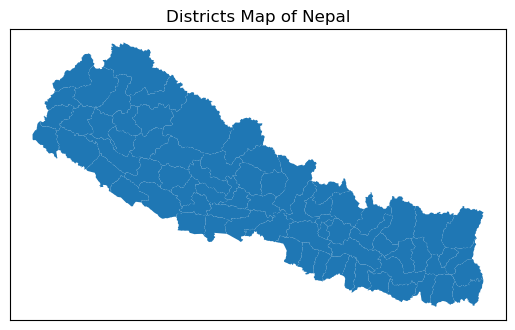

In [29]:
districts.plot()
plt.title('Districts Map of Nepal')  # Add a title to the plot
plt.xticks([])  # Hide X axis ticks
plt.yticks([])  # Hide Y axis ticks
plt.show()

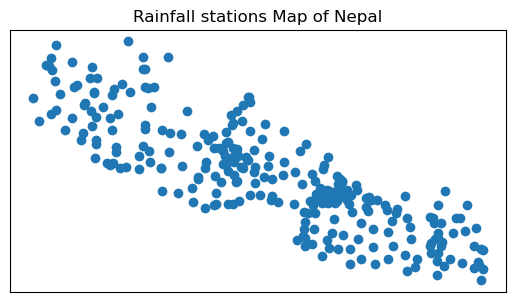

In [30]:
rainfall_stations.plot()
plt.title('Rainfall stations Map of Nepal')  # Add a title to the plot
plt.xticks([])  # Hide X axis ticks
plt.yticks([])  # Hide Y axis ticks
plt.show()

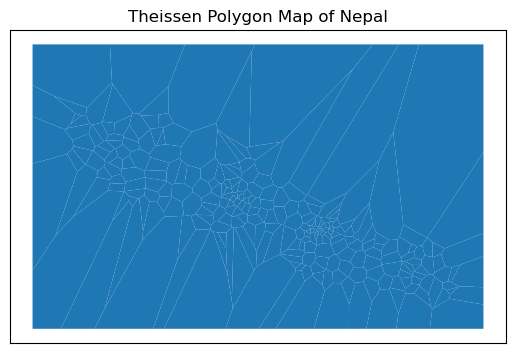

In [31]:
thiessen_polygons.plot()
plt.title('Theissen Polygon Map of Nepal')  # Add a title to the plot
plt.xticks([])  # Hide X axis ticks
plt.yticks([])  # Hide Y axis ticks
plt.show()

In [32]:
# Adding a new column to the thiessen_polygons attributes table
thiessen_polygons['Station_Name'] = 'to be filled later'  
print(thiessen_polygons.head())

   OBJECTID                                           geometry  \
0         1  POLYGON ((331658.128 2872144.821, 257186.675 2...   
1         2  POLYGON ((566749.965 2972654.068, 555033.404 2...   
2         3  POLYGON ((185755.372 3167922.390, 166619.094 3...   
3         4  POLYGON ((-44852.199 3174037.487, -62423.742 3...   
4         5  POLYGON ((-62053.093 3352281.942, -110749.045 ...   

         Station_Name  
0  to be filled later  
1  to be filled later  
2  to be filled later  
3  to be filled later  
4  to be filled later  


In [33]:
for index, row in thiessen_polygons.iterrows():
    for index_, row_ in rainfall_stations.iterrows():
        # Aquiring the name of the corresponding rainfall station into the attributes table of the polygons 
        if row['geometry'].contains(rainfall_stations.iloc[index_]['geometry']):
            thiessen_polygons.loc[index, 'Station_Name'] = row_['Name']

print(thiessen_polygons.head())

   OBJECTID                                           geometry  \
0         1  POLYGON ((331658.128 2872144.821, 257186.675 2...   
1         2  POLYGON ((566749.965 2972654.068, 555033.404 2...   
2         3  POLYGON ((185755.372 3167922.390, 166619.094 3...   
3         4  POLYGON ((-44852.199 3174037.487, -62423.742 3...   
4         5  POLYGON ((-62053.093 3352281.942, -110749.045 ...   

         Station_Name  
0                GAUR  
1              LETANG  
2                LETE  
3  CHISAPANI(KARNALI)  
4            DARCHULA  


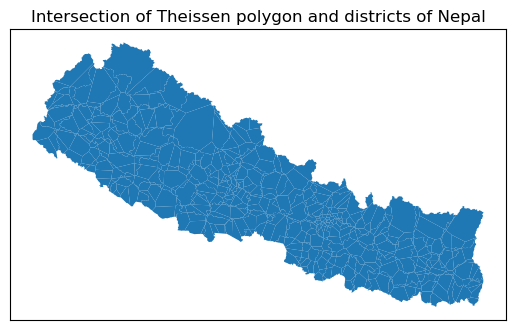

In [34]:
# Intersecting thiessen polygons with the districts 
intersect_poly = geopandas.overlay(thiessen_polygons,districts, how = 'intersection')    

# plotting the intersecting polygon
intersect_poly.plot()
plt.title('Intersection of Theissen polygon and districts of Nepal')  # Add a title to the plot
plt.xticks([])  # Hide X axis ticks
plt.yticks([])  # Hide Y axis ticks
plt.show()

In [35]:
# Create a new column called 'Shape_Area'
intersect_poly['Shape_Area'] =  intersect_poly.area/1000000

print(intersect_poly.head())

   OBJECTID    Station_Name District        Area  \
0         1            GAUR  Sarlahi  1264.00126   
1        36       MANUSMARA  Sarlahi  1264.00126   
2        41  RAMOLI BAIRIYA  Sarlahi  1264.00126   
3        44        MALANGWA  Sarlahi  1264.00126   
4        45         GAUSALA  Sarlahi  1264.00126   

                                            geometry  Shape_Area  
0  POLYGON ((341590.003 2963747.966, 341398.457 2...   39.334931  
1  POLYGON ((349057.260 2965262.348, 349035.994 2...  212.907342  
2  POLYGON ((341150.857 2981897.755, 341143.210 2...   99.414901  
3  POLYGON ((351619.866 2984104.481, 354190.123 2...  269.721239  
4  POLYGON ((367709.330 2982287.068, 374988.428 2...   48.461769  


In [36]:
# Extracting the District and Area columns from the geodataframe to a new pandas dataframe   
district_areas = pandas.DataFrame(districts[['District', 'Area']])
district_areas.set_index('District', inplace = True)   # setting the district column as index for district areas dataframe

In [37]:
# Adding a new column to the intersect_poly attributes table
#intersect_poly['weights'] = intersect_poly['weights'].astype(float)
intersect_poly['weights'] = 0

In [38]:
# Assign the thiessen weights to the new column
for index_a, row_a in intersect_poly.iterrows():
    intersect_poly.loc[index_a, 'weights'] = row_a['Shape_Area']/(district_areas.loc[row_a['District']]['Area'])

print(intersect_poly.head())

   OBJECTID    Station_Name District        Area  \
0         1            GAUR  Sarlahi  1264.00126   
1        36       MANUSMARA  Sarlahi  1264.00126   
2        41  RAMOLI BAIRIYA  Sarlahi  1264.00126   
3        44        MALANGWA  Sarlahi  1264.00126   
4        45         GAUSALA  Sarlahi  1264.00126   

                                            geometry  Shape_Area   weights  
0  POLYGON ((341590.003 2963747.966, 341398.457 2...   39.334931  0.031119  
1  POLYGON ((349057.260 2965262.348, 349035.994 2...  212.907342  0.168439  
2  POLYGON ((341150.857 2981897.755, 341143.210 2...   99.414901  0.078651  
3  POLYGON ((351619.866 2984104.481, 354190.123 2...  269.721239  0.213387  
4  POLYGON ((367709.330 2982287.068, 374988.428 2...   48.461769  0.038340  


C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_16448\2747932200.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.031119376570895977' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intersect_poly.loc[index_a, 'weights'] = row_a['Shape_Area']/(district_areas.loc[row_a['District']]['Area'])


In [39]:
#Creating a new pandas dataframe to save the weights
weights = pandas.DataFrame(intersect_poly[['Station_Name', 'District', 'weights']])
weights.to_csv('thiessen_weights_calc.csv')


print(weights.head())

     Station_Name District   weights
0            GAUR  Sarlahi  0.031119
1       MANUSMARA  Sarlahi  0.168439
2  RAMOLI BAIRIYA  Sarlahi  0.078651
3        MALANGWA  Sarlahi  0.213387
4         GAUSALA  Sarlahi  0.038340


# Population Data

In [40]:
import pandas as pd
import geopandas as gpd

In [41]:
# Read the tables from the website
data = pd.read_html('http://citypopulation.de/php/nepal-mun-admin.php')

# Assuming data[0] is the relevant table
df = data[0]

# Save the data as a CSV file with UTF-8 encoding
df.to_csv('population_data.csv', index=False, encoding='utf-8')

print(df.head())

                 Name              Status         Transcription  \
0              Achham            District                Achāma   
1  Bannigadhi Jaygadh  Rural Municipality  Bānnigaḍhī Jayagaḍha   
2           Chaurpati  Rural Municipality             Caurapāṭī   
3             Dhakari  Rural Municipality               Ḍhakārī   
4          Kamalbazar        Municipality          Kamalabajāra   

                      Native Population Census 2001-05-28  \
0                अछाम जिल्ला                       231285   
1  बान्निगढी जयगढ गाउँपालिका                        17102   
2         चौरपाटी गाउँपालिका                        23323   
3           ढकारी गाउँपालिका                          ...   
4          कमलबजार नगरपालिका                          ...   

   Population Census 2011-06-22  Population Census 2021-11-25 Unnamed: 7  
0                        257477                        228852          →  
1                         17426                         13519          →  
2    

In [42]:
population_data = pd.read_csv('population_data.csv')
population_data = population_data[['Name','Status','Population Census 2011-06-22']]
population_data.rename(columns = {'Population Census 2011-06-22': 'Population'}, inplace = True)


print(population_data.head())

                 Name              Status  Population
0              Achham            District      257477
1  Bannigadhi Jaygadh  Rural Municipality       17426
2           Chaurpati  Rural Municipality       25215
3             Dhakari  Rural Municipality       21570
4          Kamalbazar        Municipality       23770


In [43]:
# Filter rows by value
population_data = population_data.loc[population_data['Status'] == 'District']

print(population_data.head())

            Name    Status  Population
0         Achham  District      257477
12  Arghakhanchi  District      197632
19       Baglung  District      268613
31       Baitadi  District      250898
42       Bajhang  District      195159


In [44]:
# Create an empty column 
population_data['Districts2'] = ''

print(population_data.head())

            Name    Status  Population Districts2
0         Achham  District      257477           
12  Arghakhanchi  District      197632           
19       Baglung  District      268613           
31       Baitadi  District      250898           
42       Bajhang  District      195159           


In [45]:

for index, row in population_data.iterrows():
    if '[' and ']' in row['Name']:
        start_index = row['Name'].find('[')
        end_index = row['Name'].find(']')
        population_data.loc[index, 'Districts2'] = population_data.loc[index]['Name'][start_index+1: end_index]

    else:
        population_data.loc[index, 'Districts2'] = population_data.loc[index]['Name']


print(population_data.head())

            Name    Status  Population    Districts2
0         Achham  District      257477        Achham
12  Arghakhanchi  District      197632  Arghakhanchi
19       Baglung  District      268613       Baglung
31       Baitadi  District      250898       Baitadi
42       Bajhang  District      195159       Bajhang


In [46]:
population_data = population_data[['Population', 'Districts2']]
population_data.rename(columns = {'Districts2': 'District'}, inplace = True)

print(population_data.head())

    Population      District
0       257477        Achham
12      197632  Arghakhanchi
19      268613       Baglung
31      250898       Baitadi
42      195159       Bajhang


In [47]:
# Reading data from the shapefile 
nep_districts = gpd.read_file(r"D:\JP CERTIFICATES\IITK\Course summerterm\AArcGIS project\NPL_adm\NPL_adm3.shp")
nep_districts = nep_districts[['NAME_3', 'geometry']]
nep_districts.rename(columns = {'NAME_3' : 'District'}, inplace = True)

# Reprojecting to projected coordinate system 
nep_districts.to_crs(epsg=32645, inplace = True)


population_data.replace('Sindhupalchowk', 'Sindhupalchok', inplace = True)
population_data.replace('Chitwan', 'Chitawan', inplace = True)
population_data.replace('Tehrathum', 'Terhathum', inplace = True)
population_data.replace('Dang Deukhuri', 'Dang', inplace = True)
population_data.replace('Tanahun', 'Tanahu', inplace = True)
population_data.replace('Kapilvastu', 'Kapilbastu', inplace = True)



print(population_data.head())

    Population      District
0       257477        Achham
12      197632  Arghakhanchi
19      268613       Baglung
31      250898       Baitadi
42      195159       Bajhang


In [48]:
for index, row in nep_districts['District'].items():
    if row in population_data['District'].tolist():
        pass 
    else:
        print('The district ', row , ' is NOT in the population_data list')

The district  Kanchanpur  is NOT in the population_data list
The district  Rukum  is NOT in the population_data list
The district  Nawalparasi  is NOT in the population_data list


In [49]:
# Create a new column and calculate the areas of the districts 
nep_districts['area'] = nep_districts.area/1000000

In [50]:
# Do an attributes join 
nep_districts = nep_districts.merge(population_data, on = 'District')

In [51]:
# Create a population density column
nep_districts['pop_den (people/sq. km)'] = nep_districts['Population']/nep_districts['area']

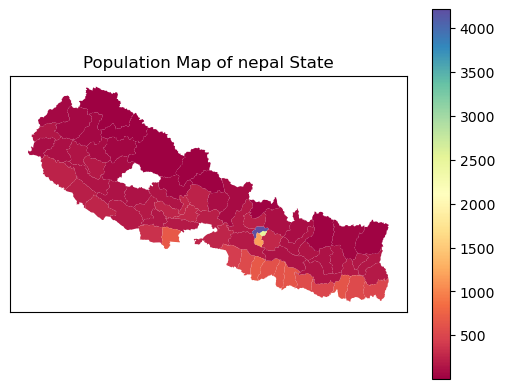

<Figure size 640x480 with 0 Axes>

In [53]:
# Plotting 
nep_districts.plot(column = 'pop_den (people/sq. km)', cmap = 'Spectral', legend = True)
plt.title('Population Map of nepal State')  # Add a title to the plot
plt.xticks([])  # Hide X axis ticks
plt.yticks([])  # Hide Y axis ticks
plt.show()

plt.savefig('population_density_NEPAL.jpg')
